# Рубежный контроль
## Трофимова Юлия РТ5-61 Вариант 15

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('restaurant-scores.csv')

In [3]:
data.shape

(53973, 17)

In [4]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,69618,Fancy Wheatfield Bakery,1362 Stockton St,San Francisco,CA,94133,NaN,NaN,NaN,NaN,69618_20190304,2019-03-04T00:00:00.000,NaN,Complaint,69618_20190304_103130,Inadequate sewage or wastewater disposal,Moderate Risk
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,69487,Hakkasan San Francisco,1 Kearny St,San Francisco,CA,94108,NaN,NaN,NaN,NaN,69487_20180418,2018-04-18T00:00:00.000,88.0,Routine - Unscheduled,69487_20180418_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,91044,Chopsticks Restaurant,4615 Mission St,San Francisco,CA,94112,NaN,NaN,NaN,NaN,91044_20170818,2017-08-18T00:00:00.000,NaN,Non-inspection site visit,NaN,NaN,NaN
4,85987,Tselogs,552 Jones St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,85987_20180412,2018-04-12T00:00:00.000,94.0,Routine - Unscheduled,85987_20180412_103132,Improper thawing methods,Moderate Risk


In [5]:
data.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [6]:
# проверяем на пропущенные значения
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

Видим, что пропуски присутствуют в столбцах business_postal_code, business_latitude, business_longitude, business_location,
business_phone_number, inspection_score, violation_id, violation_description, risk_category

Проведем обработку пропусков для столбцов inspection_score(количественный признак) и risk_category(категориальный признак)

In [7]:
data['inspection_score'].unique()

array([ nan,  96.,  88.,  94.,  86., 100.,  90.,  72.,  82.,  92.,  89.,
        84.,  93.,  87.,  74.,  78.,  57.,  75.,  83.,  91.,  79.,  80.,
        66.,  85.,  77.,  65.,  81.,  67.,  73.,  98.,  68.,  64.,  76.,
        71.,  61.,  46.,  59.,  55.,  62.,  70.,  60.,  69.,  63.,  58.,
        54.,  45.,  48.,  51.])

In [8]:
from sklearn.impute import SimpleImputer

# Для принака inspection_score пустые значения будем заменять на среднее значение
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data['inspection_score'] = imp.fit_transform(data[['inspection_score']])
data['inspection_score'].unique()

array([ 86.23525427,  96.        ,  88.        ,  94.        ,
        86.        , 100.        ,  90.        ,  72.        ,
        82.        ,  92.        ,  89.        ,  84.        ,
        93.        ,  87.        ,  74.        ,  78.        ,
        57.        ,  75.        ,  83.        ,  91.        ,
        79.        ,  80.        ,  66.        ,  85.        ,
        77.        ,  65.        ,  81.        ,  67.        ,
        73.        ,  98.        ,  68.        ,  64.        ,
        76.        ,  71.        ,  61.        ,  46.        ,
        59.        ,  55.        ,  62.        ,  70.        ,
        60.        ,  69.        ,  63.        ,  58.        ,
        54.        ,  45.        ,  48.        ,  51.        ])

In [9]:
data['risk_category'].unique()

array(['Moderate Risk', nan, 'Low Risk', 'High Risk'], dtype=object)

In [10]:
# Мне кажется, что нельзя проставлять какое-либо значение для риска, где он не указан, поэтому будем заменять 
# пустые значения на "Unknown"
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data['risk_category'] = imp.fit_transform(data[['risk_category']])
data['risk_category'].unique()

array(['Moderate Risk', 'Unknown', 'Low Risk', 'High Risk'], dtype=object)

Для дальнейшего построения модели машинного обучения я бы использовала признаки risk_category(целевой признак), inspection_score(потому что он отражает результат проверки и напрямую влияет на категорию риска) и inspection_type(потому что результат проверки может сильно зависеть от ее типа, например, было ли проверяемое заведение предупреждено о проверке)
См. ниже

In [42]:
data_sorted = data.sort_values('inspection_score')
x = data_sorted['inspection_score']

high_scores = []
for num in x:
    high_scores.append(data_sorted[(data_sorted['inspection_score']==num) & (data_sorted['risk_category']=='High Risk')].shape[0])
    
moderate_scores = []
for num in x:
    moderate_scores.append(data_sorted[(data_sorted['inspection_score']==num) & (data_sorted['risk_category']=='Moderate Risk')].shape[0])

low_scores = []
for num in x:
    low_scores.append(data_sorted[(data_sorted['inspection_score']==num) & (data_sorted['risk_category']=='Low Risk')].shape[0])


Text(0, 0.5, 'Количество заведений с категорией High Risk')

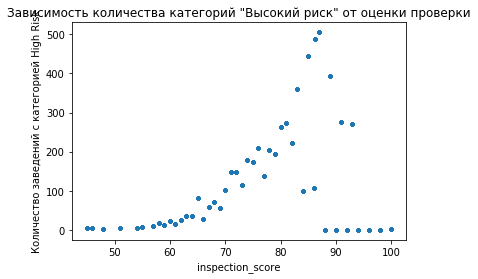

In [43]:
plt.scatter(x, high_scores, marker=".")
plt.title('Зависимость количества категорий "Высокий риск" от оценки проверки')
plt.xlabel('inspection_score')
plt.ylabel('Количество заведений с категорией High Risk')

Text(0, 0.5, 'Количество заведений с категорией Moderate Risk')

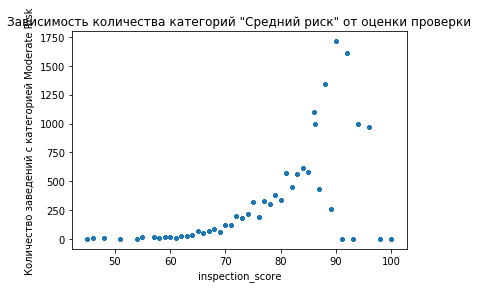

In [44]:
plt.scatter(x, moderate_scores, marker=".")
plt.title('Зависимость количества категорий "Средний риск" от оценки проверки')
plt.xlabel('inspection_score')
plt.ylabel('Количество заведений с категорией Moderate Risk')

Text(0, 0.5, 'Количество заведений с категорией Low Risk')

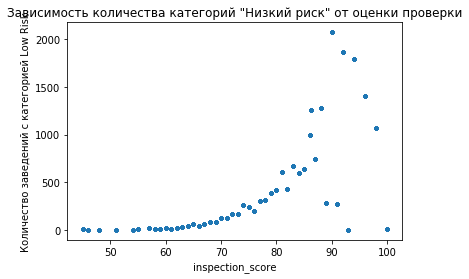

In [45]:
plt.scatter(x, low_scores, marker=".")
plt.title('Зависимость количества категорий "Низкий риск" от оценки проверки')
plt.xlabel('inspection_score')
plt.ylabel('Количество заведений с категорией Low Risk')

In [56]:
risk = data[(data['inspection_type']== 'Routine - Unscheduled') & ((data['risk_category']=='High Risk') | (data['risk_category']=='Moderate Risk'))].shape[0]
total = data[data['inspection_type']== 'Routine - Unscheduled'].shape[0]
print('{}%'.format(risk / total * 100))

49.51696866553208%


In [57]:
risk = data[(data['inspection_type']== 'Routine - Scheduled') & ((data['risk_category']=='High Risk') | (data['risk_category']=='Moderate Risk'))].shape[0]
total = data[data['inspection_type']== 'Routine - Scheduled'].shape[0]
print('{}%'.format(risk / total * 100))

30.263157894736842%


Видим, что при незапланированных проверках выявление рисков несколько выше